<a href="https://colab.research.google.com/github/6uoas/HG-Machine/blob/main/hg6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keywords = dimensionality_reduction, PCA(principal component analysis), explained_variance

In [77]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-01-03 07:21:51--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-01-03 07:21:51--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-01-03 07:21:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [78]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [80]:
print(pca.components_.shape)

(50, 10000)


In [81]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

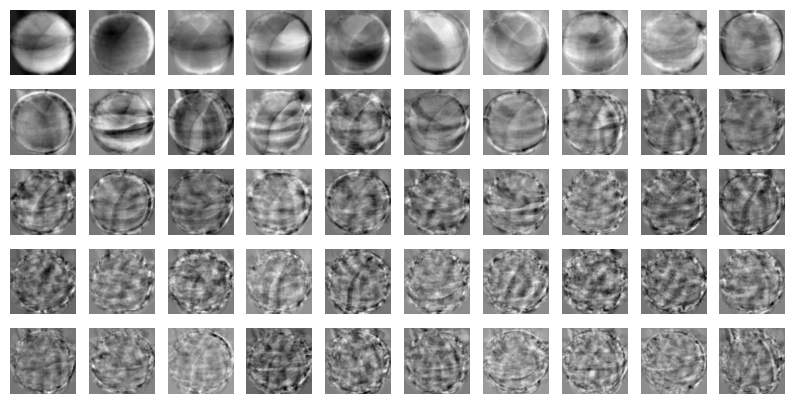

In [82]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [83]:
print(fruits_2d.shape)

(300, 10000)


In [84]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [85]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


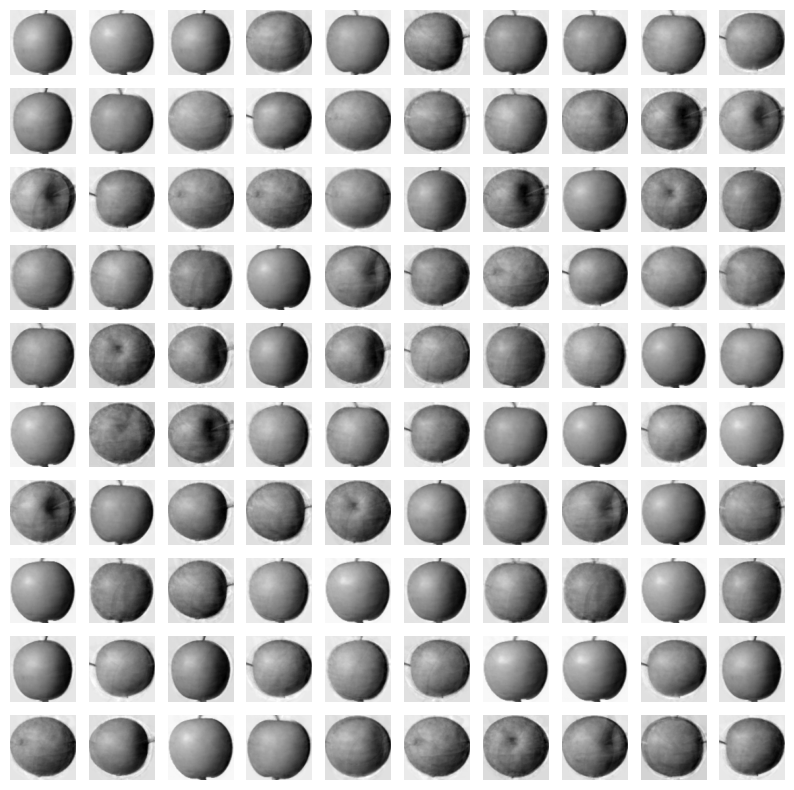

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# reducing memory & improving velocity

In [ ]:
#n_component = 0.5 : variance ratio = 0.5
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

In [ ]:
print(pca.n_components_)

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3 ,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])

plt.legend(['apple','banana','pineapple'])
plt.show()

# dimensinality reduction makes visualization easier

**QUIZ**

1. feature > principal components, always works
2. (1000,10)
3. first component has the biggest explained variance

ch6 fin.